# ML model

## ML algorithm   

**1.Supervised**Train on labeled data to predict labels  
**2.Semisupervised**Train on both labeled and unlabeled data, use models to infer labels for unlabeled data  
E.g. self-training  
**3.Unsupervised**Train on unlabeled data  
E.g. clustering, density estimation  
**4.Reinforcement learning**Use observations from the interaction with the environment to take actions to maximize reward  


## supervised training model

### 1、Decision trees  

使用自顶向下的方法，根节点具有所有特征，每个父节点拆分一个特征  
特征选择标准  
- 最大限度地减少连续目标的方差  
- 最大化信息增益(1-熵)的分类目标  
- 对特定目标进行最大化基尼指数  

**1)信息熵**  

（Information Entropy）是用来度量样本纯度的指标，表示不确定性的大小  
信息增益表示得知特征X的信息而使得类Y的信息的不确定性减少的程度  
信息熵公式
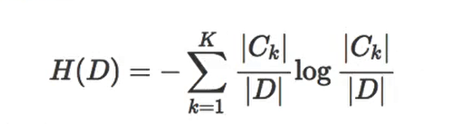
条件信息熵公式
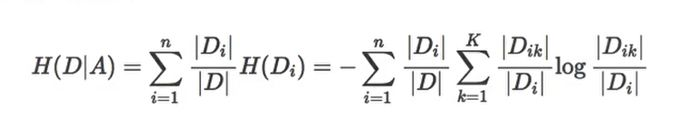
信息增益的计算步骤
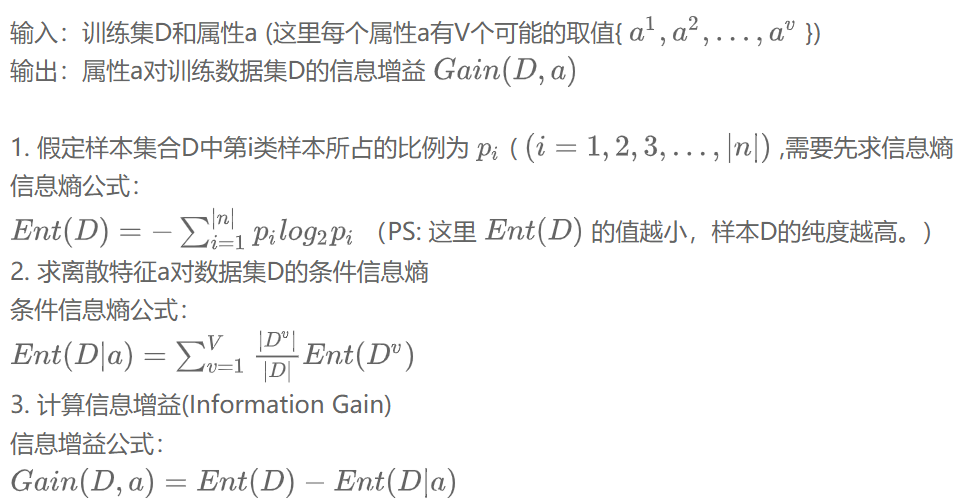
选择信息增益最大的，代表对分类影响最大  

**2)信息增益率**   

如果某个属性的分类很多，也就是分叉超多，那么该属性下的样本就很少，此时的信息增益就非常高  
但取值较多的属性用作划分依据时，它的泛化能力弱，没法对新样本有效预测  
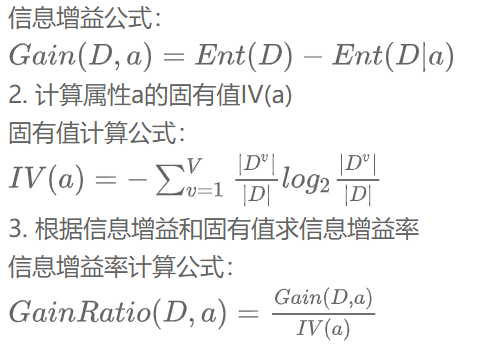
先从划分出的属性中找到信息增益高于平均的那些属性，然后再从这些属性中选信息增益率最高的  

**3)基尼指数**  

反映的是数据集中随机抽取两个样本，而他们类别标志不一致的概率。基尼指数越小，代表数据集D的纯度越高  
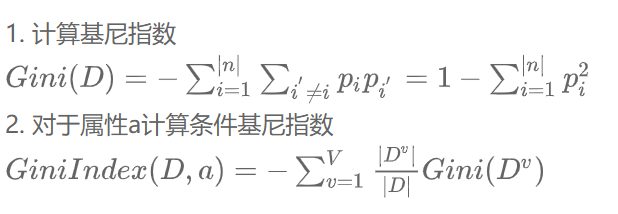
选择基尼指数最小的，代表在样本类别不一致的概率最小  

**决策树不同的算法**  

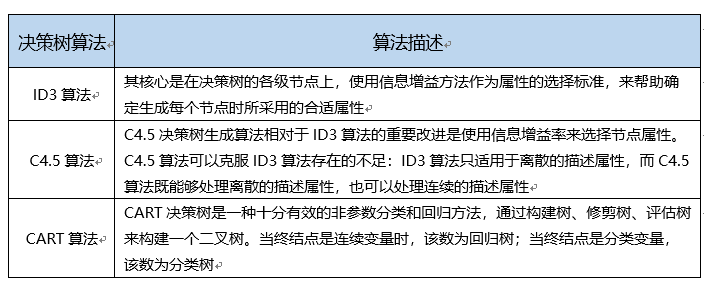

**决策树的优缺点**  

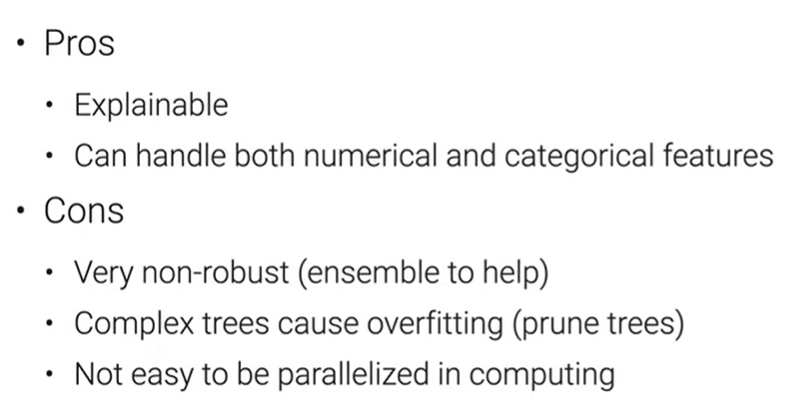

使用sklearn工具包里的决策树算法

In [ ]:
from sklearn.tree import DecisionTreeClassifier #导入分类模型
from sklearn.tree import DecisionTreeRegressor  #导入回归模型

model_c = DecisionTreeClassifier(max_depth=10,max_features=5) #括号内加入要人工设定的参数
model_r = DecisionTreeRegressor(max_depth=10,max_features=5)  #同样的，加入参数设定值，不仅局限于这几个

model_c.fit(x_train,y_train)  #训练分类模型
model_r.fit(x_train,y_train)  #训练回归模型

result_c = model_c.predict(x_test)  #使用模型预测分类结果
result_r = model_r.predict(x_test)  #使用模型预测回归结果

sklearn.tree.DecisionTreeClassifier(criterion='gini',max_deepth=None,random_state=None)

鸢尾花（分类模型）

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.metrics import accuracy_score

iris = load_iris()
x = iris.data #特征数据
y = iris.target #分类数据

#导入数据集iris
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names) #读取csv数据
print(dataset.describe())

# 分割数据集到训练集和测试集
#x，y是原始的数据集,X_train,y_train 是原始数据集划分出来作为训练模型的，fit模型的时候用。
#X_test,y_test 这部分的数据不参与模型的训练，而是用于评价训练出来的模型好坏，score评分的时候用
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1,random_state=1234)
# 用决策树进行训练
#默认计算方式为gini指数，即CART算法
dec = DecisionTreeClassifier(criterion='gini') 
dec.fit(x_train, y_train)

#进行预测
predict = clf.predict(x_test)
#预测结果与测试集结果作对比
score = accuracy_score(y_test,predict)

print('CRAT分类树预测准确率 %.2lf'%score)

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
CRAT分类树预测准确率 1.00


房价（回归模型）

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# 随机抽取 25% 的数据作为测试集，其余为训练集
train_features, test_features, train_price, test_price = train_test_split(data, target,test_size=0.25,random_state=1234)

# 创建 CART 回归树
dtr = DecisionTreeRegressor()

# 拟合构造 CART 回归树
dtr.fit(train_features, train_price)

# 预测测试集中的房价
predict_price = dtr.predict(test_features)

# 测试集的结果评价
print('回归树二乘偏差均值:', mean_squared_error(test_price, predict_price))
print('回归树绝对值偏差均值:', mean_absolute_error(test_price, predict_price))

回归树二乘偏差均值: 13.718582677165355
回归树绝对值偏差均值: 2.6519685039370082


不稳定，对噪声敏感，使用大量树模型来降低偏移和方差   
**随机森林**  

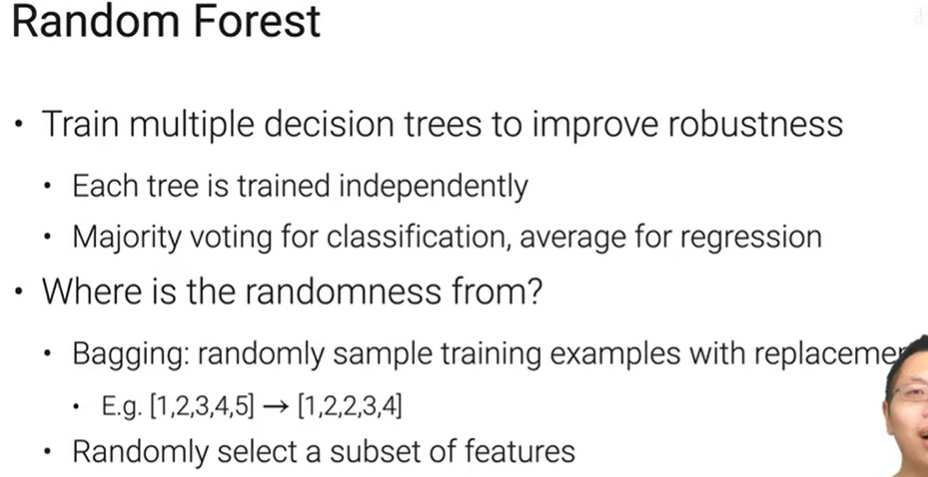
bagging是一种在原始数据集上，通过有放回抽样分别选出k个新数据集，来训练分类器的集成算法。分类器之间没有依赖关系。  
随机森林属于bagging集成算法。通过组合多个弱分类器，使得整体模型具有较高的精确度和泛化性能。  


可以使用RandomForstClassifier来构造随机森林   
criterion: gini or entropy  
max_depth: (default=None)设置树的最大深度  
min_samples_split:根据属性划分节点时，每个划分最少的样本数  
min_samples_leaf:叶子节点最少的样本数  
n_estimators=10：决策树的个数  
bootstrap=True：是否有放回的采样  
n_jobs=1：并行job个数  

**GBDT树**  
L是预测值和真实值的平均均方误差，取一个负梯度  
每次训练一个新的树就是去拟合梯度负数，每一棵树学的是之前所有树结论和的残差，这个残差就是一个加预测值后能得真实值的累加量   
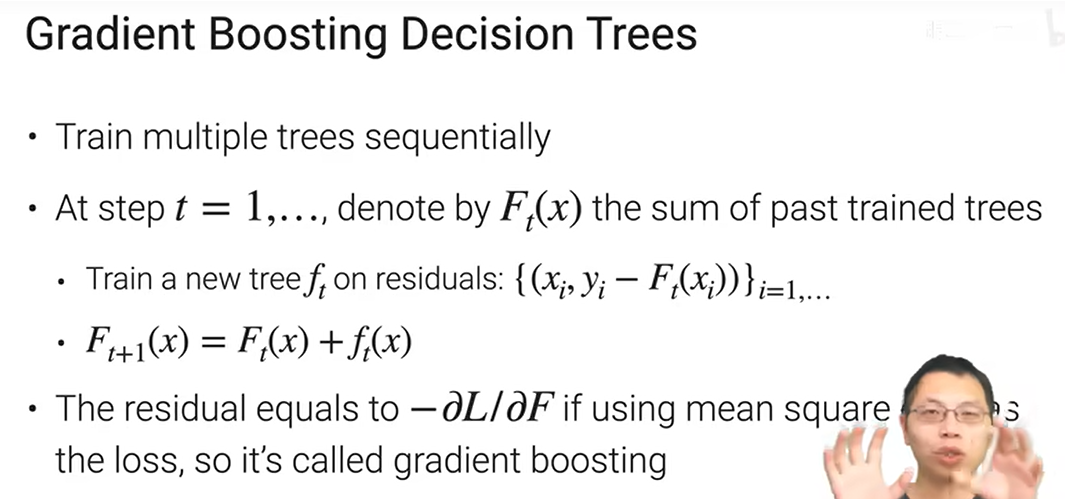


使用代码  
GradientBoostingClassifier(loss=’deviance’,learning_rate=0.1,n_estimators=100,subsample=1,max_depth=3)  
loss 损失函数  
learning_rate 学习率，也被叫作步长  
n_estimators 弱学习器最大迭代次数。太大容易过拟合，太小容易欠拟合  
subsample 子采样，取值为(0,1]  
Max_depth 决策树的最大深度  

**随机森林中的树一般会比较深，以尽可能地降低偏差；而GBDT树的深度会比较浅，通过减少模型复杂度来降低方差**


### 2、Linear methods

**这个模型中大量用到数学知识，概率论好多忘了，暂时先了解模型逻辑和代码，后期回来数学推导**

**a.一元线性回归**  

定数据集D = {(x1,y1),(x2,y2),......,(xm,ym)}，其中xi=(xi1;xi2;...;xid),yi属于R  
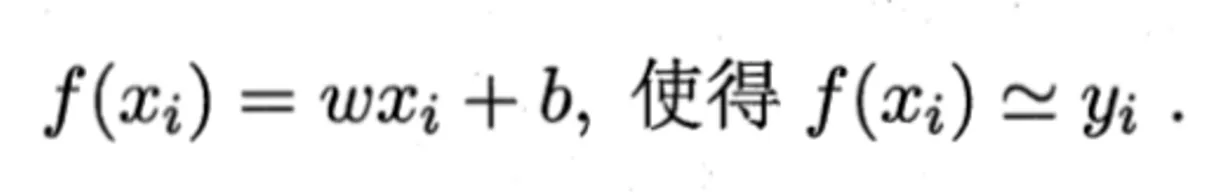  
用最小二乘法来确定w和b
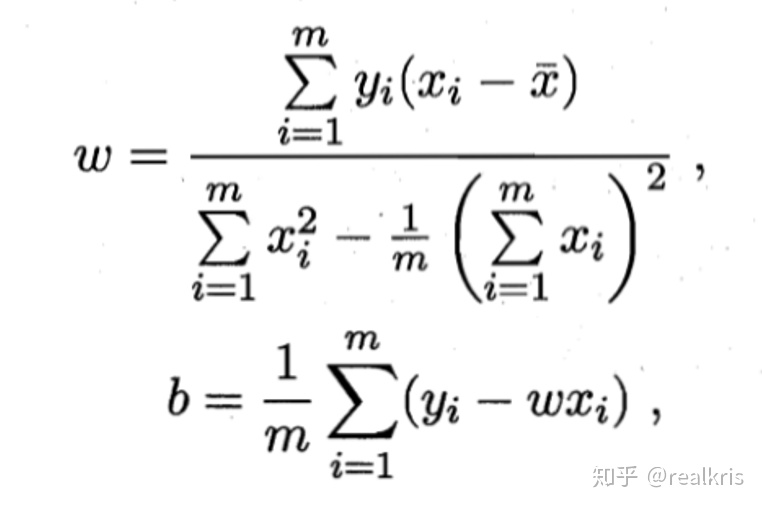  
**b.多元线性回归**  

f(x) = w1x1+w2x2+......+wnxdn+b,  y=(y1;y2;......;ym)
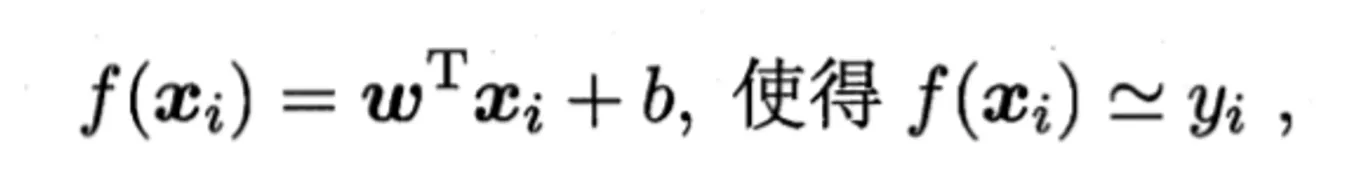  
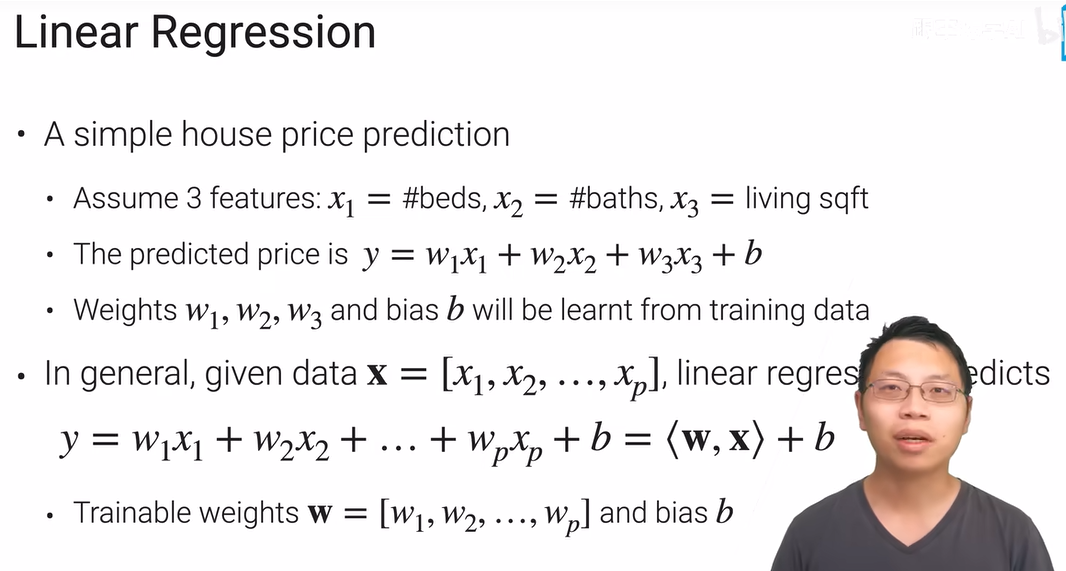  

In [ ]:
# weight w has shape (p, 1)
# bias b is a scalar
# data x has shape (p, 1)
y_hat = (x*w).sum() + b

用于评价回归算法指标  
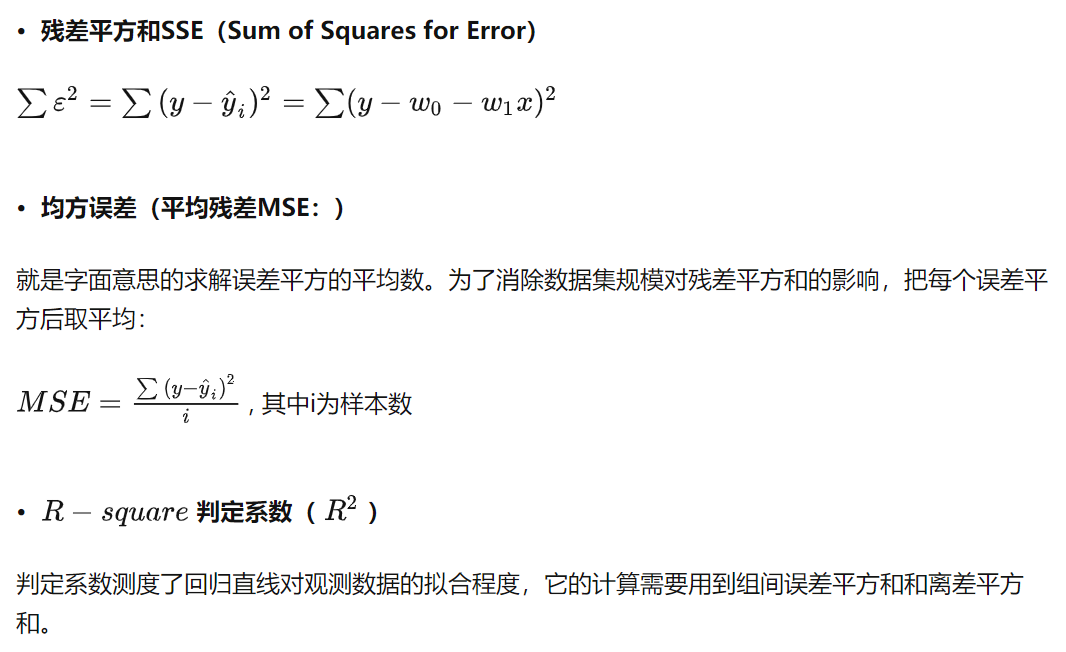
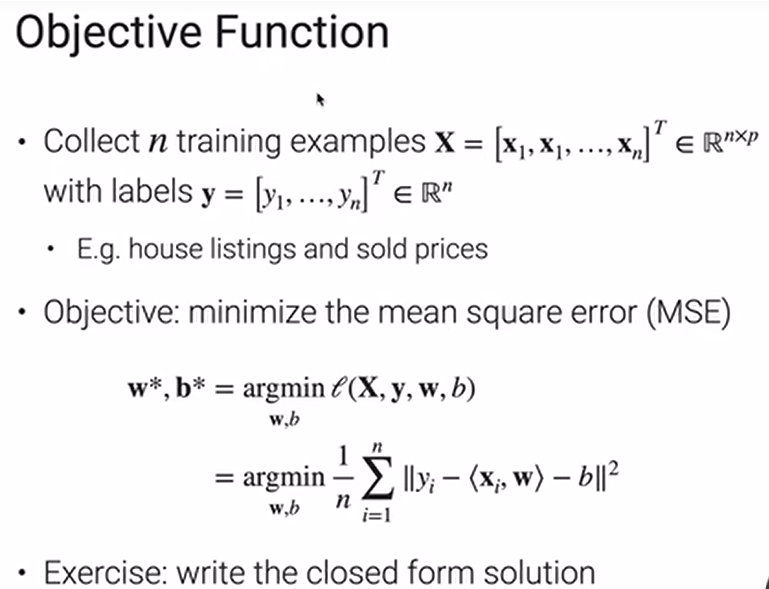  
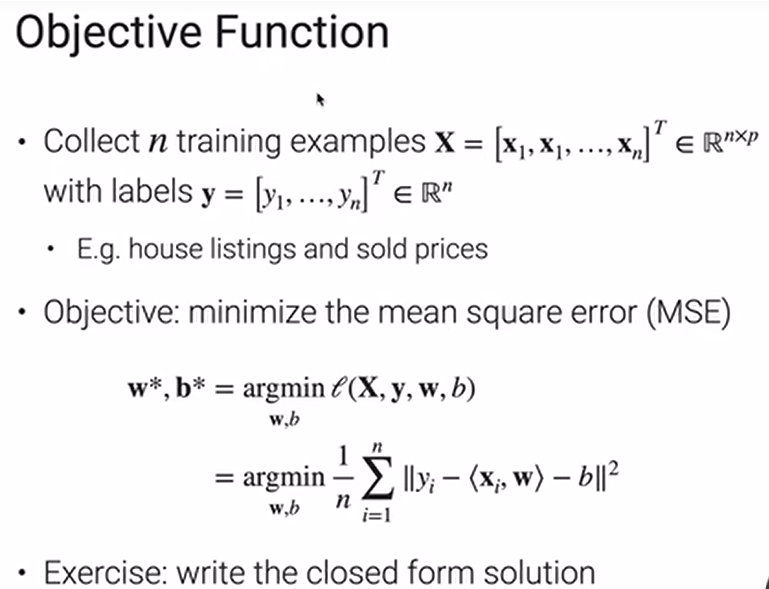  

In [23]:
#线性回归代码示例
from sklearn import linear_model,datasets
digits=datasets.load_digits()
#构建线性回归模型
clf = linear_model.LinearRegression()
#训练模型
x,y=digits.data[:-1],digits.target[:-1]
clf.fit(x,y)
#预测结果
y_pre=clf.predict([digits.data[-1]])
y_tar=digits.target[-1]
print(y_pre)
print(y_tar)

[8.86342983]
8


**c.线性模型用于分类**  


与线性回归公式非常相似，但是没有返回特征的加权求和，而是为预测设置了阈值（0）  
如果函数值小于0，我们就预测类别-1；若函数值大于0，我们就预测类别+1  
决策边界是输入的线性函数  
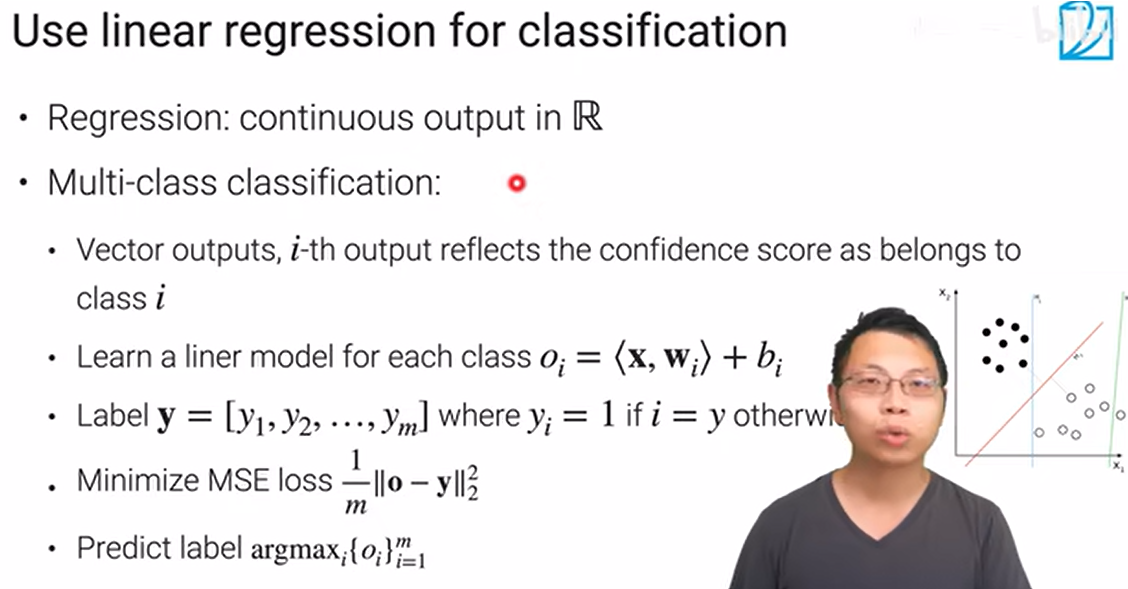  

- **Logistic回归**   

通过 Logistic 函数（即 Sigmoid 函数）将预测映射到 0 到 1 中间，因此预测值就可以看成某个类别的概率  
决定正则化强度的权衡参数叫做C  
C值越大，对应正则化越弱，也就是说，参数C的值较大，那么两个模型将尽可能将训练集拟合到最好；如果C的值较小，那么模型更强调是系数w接近于0
处理二分类

In [48]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

cancer=load_breast_cancer()
#传入参数stratify作用为以分层方式分割数据，保持测试集与整个数据集里cancer.target的数据分类比例一致
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=123)
    
logreg=LogisticRegression(C=0.01,max_iter=1000).fit(X_train,y_train)
print("Training set score:{:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score:{:.3f}".format(logreg.score(X_test,y_test)))


Training set score:0.955
Test set score:0.937


- **Softmax regression**  （之后回来数学推导）？  

处理多分类  
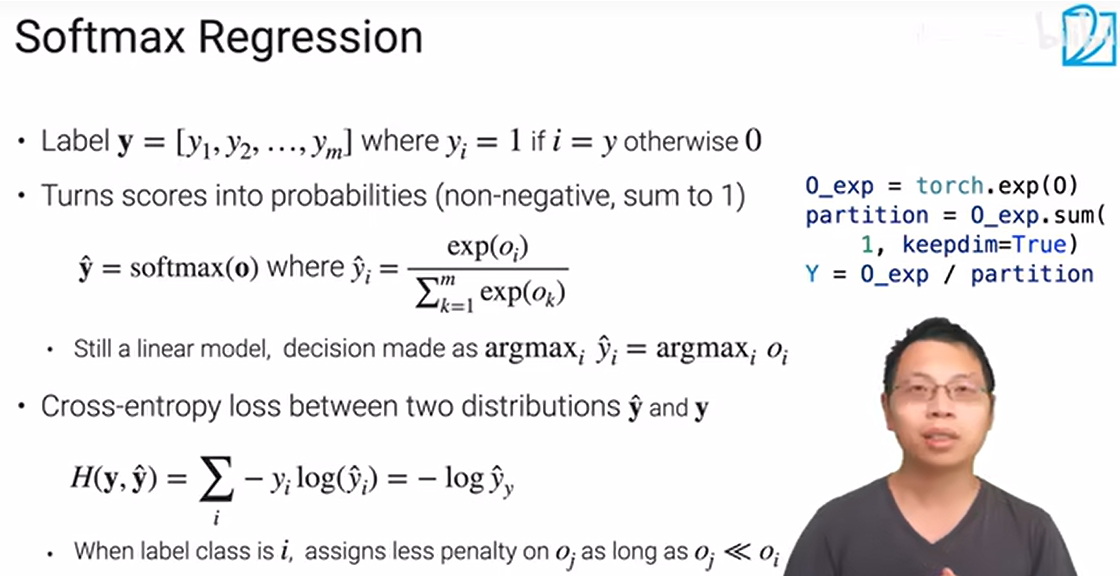  
softmax 回归将输入数据归属于某个类别的概率  
不再唯一的确定某一个最大值，而是为每个输出分类的结果都赋予一个概率值，表示属于每个类别的可能性  
只关注正确的类别上预测概率最大，其他的不关心，更多用于解决多类分类问题  
将预测转化为概率，并使用交叉熵作为损失  
两个概率分布之间的交叉熵损失  

In [ ]:
0_exp=torch.exp(0)
partition=0_exp.sum(1,keepdim=True)
Y=0_exp/partition

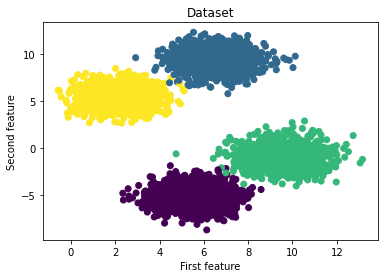

0.9976


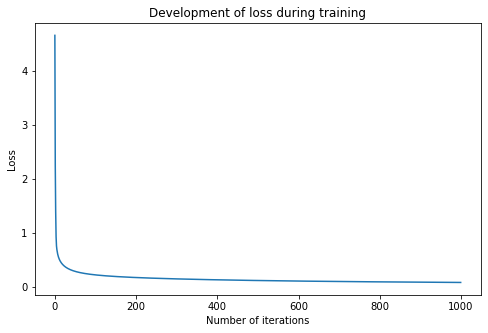

In [47]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt

np.random.seed(13)
X, y = make_blobs(centers=4, n_samples = 5000)
# 绘制数据分布
plt.figure(figsize=(6,4))
plt.scatter(X[:,0], X[:,1],c=y)
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

# 重塑目标以获得具有 (n_samples, 1)形状的列向量
y = y.reshape((-1,1))
# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y)
train_dataset = np.append(X_train,y_train, axis = 1)
test_dataset = np.append(X_test,y_test, axis = 1)
np.savetxt("train_dataset.txt", train_dataset, fmt="%.4f %.4f %d")
np.savetxt("test_dataset.txt", test_dataset, fmt="%.4f %.4f %d")

def load_dataset(file_path):
    dataMat = []
    labelMat = []
    fr = open(file_path)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
        labelMat.append(int(lineArr[2]))
    return dataMat, labelMat


if __name__ == "__main__":
    #gen_dataset()
    data_arr, label_arr = load_dataset('train_dataset.txt')
    model_softmax_regression = linear_model.LogisticRegression(solver='lbfgs',multi_class="multinomial",max_iter=1000)
    model_softmax_regression.fit(data_arr, label_arr)
    test_data_arr, test_label_arr = load_dataset('test_dataset.txt')
    y_predict = model_softmax_regression.predict(test_data_arr)
    accurcy = np.sum(y_predict == test_label_arr) / len(test_data_arr)
    print(accurcy)

    fig = plt.figure(figsize=(8,5))
    plt.plot(np.arange(1000), all_loss)
    plt.title("Development of loss during training")
    plt.xlabel("Number of iterations")
    plt.ylabel("Loss")
    plt.show()

- **Mini-batch Stochastic gradient descent (SGD)**  ？BGD未了解  

随机梯度下降

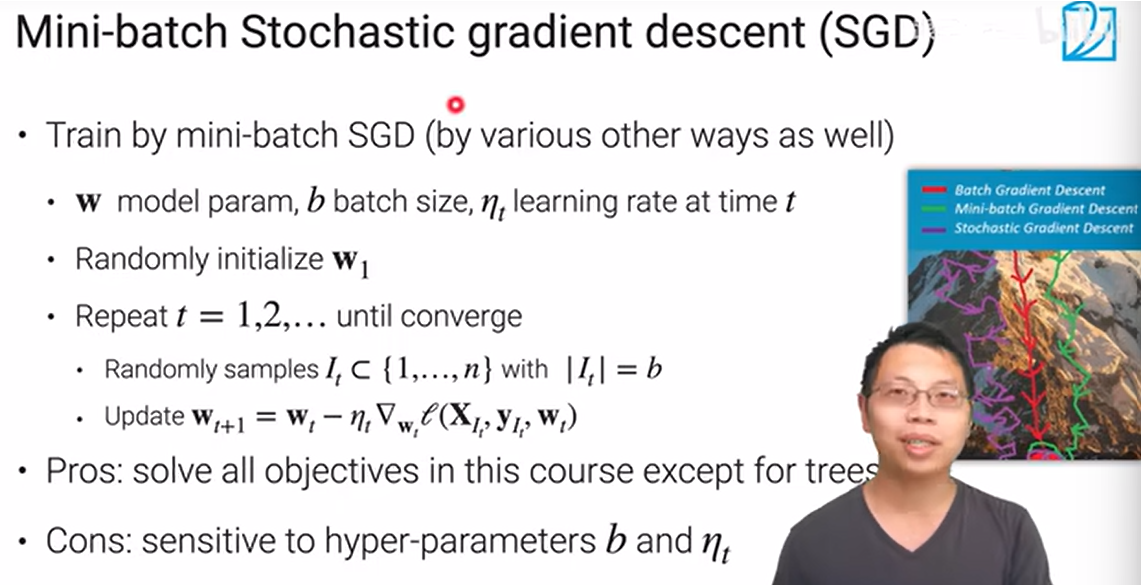  
梯度下降的本质：是一种使用梯度去迭代更新权重参数使目标函数最小化的方法  
从大样本的训练集（已经打乱样本的顺序）中随机抽出一小批量(mini-batch)样本来对参数进行更新  
在一定范围内，一般来说 Batch_Size 越大，其确定的下降方向越准，引起训练震荡越小  
随着时间的推移逐渐降低学习率—学习率衰减，更好收敛  
下面是课上一个代码示例

In [ ]:
# `features` shape is (n, p), `labels` shape is (n, 1)
def data_iter(batch_size, features, labels):
 num_examples = len(features)
 indices = list(range(num_examples))
 random.shuffle(indices) # read examples at random
 for i in range(0, num_examples, batch_size):
 batch_indices = torch.tensor(
 indices[i:min(i + batch_size, num_examples)])
 yield features[batch_indices], labels[batch_indices]
w = torch.normal(0, 0.01, size=(p, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
for epoch in range(num_epochs):
 for X, y in data_iter(batch_size, features, labels):
 y_hat = X @ w + b
 loss = ((y_hat - y)**2 / 2).mean()
 loss.backward()
 for param in [w, b]:
 param -= learning_rate * param.grad
 param.grad.zero_()


### 3、Neural Networks  

用于特性提取
- **Multilayer perceptions**  

从线性到多层感知机  
全连接层  dense   

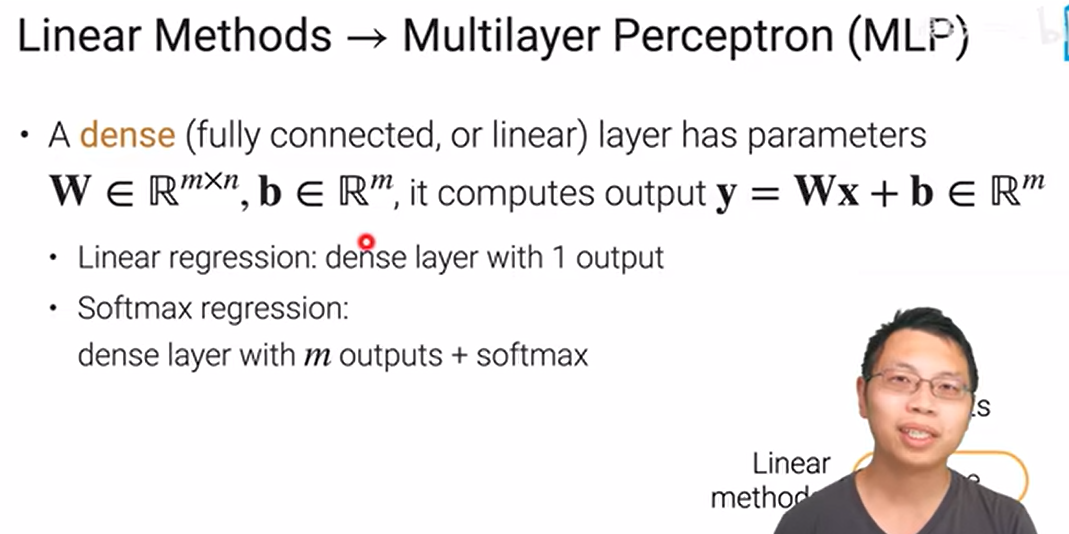
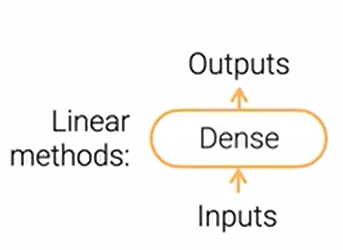
即类似结构  
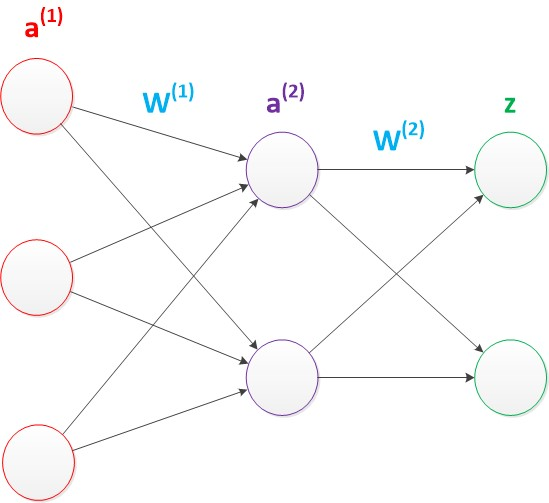  

a(1)，a(2)，z是网络中传输的向量数据。W(1)和W(2)是网络的矩阵参数  
g(W(1) * a(1)) = a(2)   
g(W(2) * a(2)) = z  
函数g也称作激活函数（active function）  非线性  
通过参数与激活函数来拟合特征与目标之间的真实函数关系  

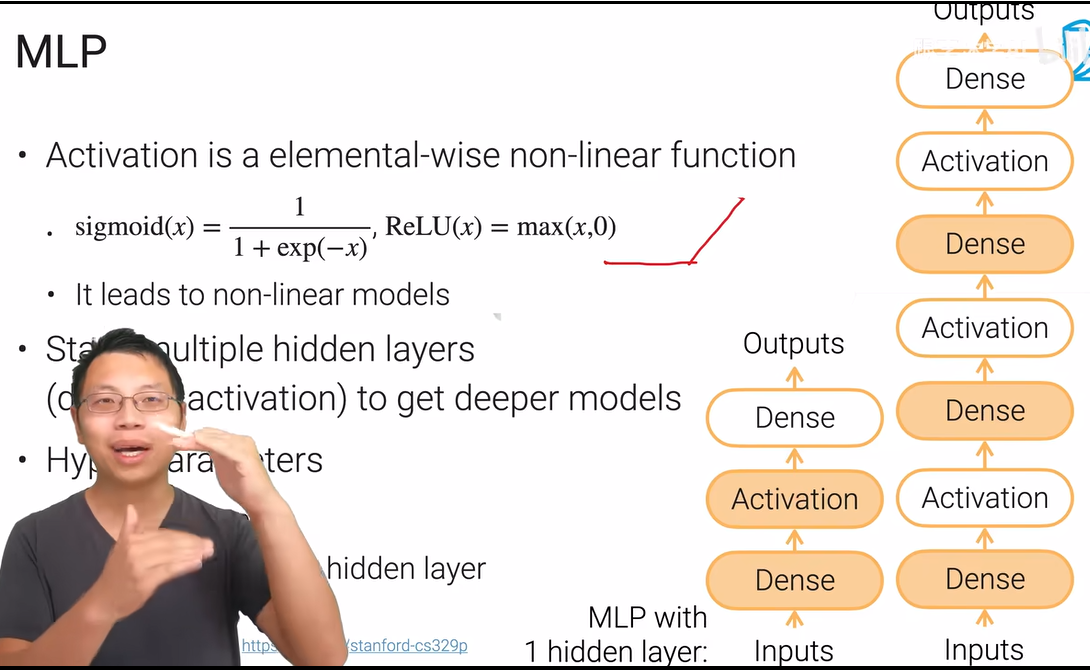  

多层感知机  多个隐藏层  dense+activation  
更深入的表示特征，以及更强的函数模拟能力  

In [50]:
#一个隐藏层代码
def relu(X):
    return torch.max(X, 0)
#返回由输入数据定义的输入数字*隐藏数字的随机数矩阵表
#torch.randn 正态分布 随机数
#torch.rand  均匀分布 随机数
#torch.zeros  里面每一个值都是0
W1 = nn.Parameter(torch.randn(num_inputs, num_hiddens) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens))
W2 = nn.Parameter(torch.randn(num_hiddens, num_outputs) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs))
#relu()激活函数
H = relu(X @ W1 + b1)
Y = H @ W2 + b2


NameError: name 'nn' is not defined

- **Convolutional neural networks**   

Dense layer → **Convolution layer**  

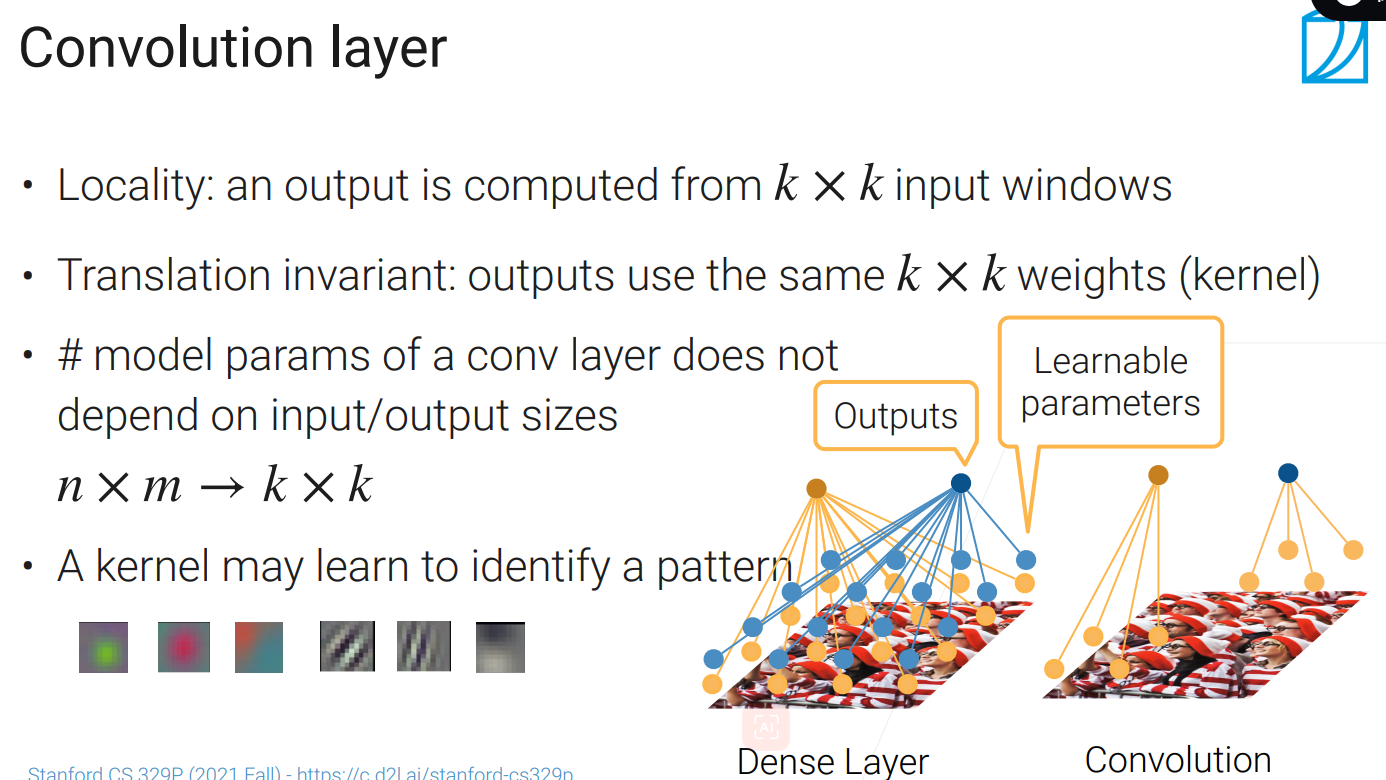
前一个卷积层专注于的相对低级的特征，后一个卷积层整合前一个卷积层的特征，形成相对复杂的特征  
卷积对位置很敏感，输入模式的平移/旋转会导致输出模式的类似变化     

卷积层的功能是对输入数据进行特征提取，其内部包含多个卷积核，组成卷积核的每个元素都对应一个权重系数和一个偏差量  
卷积层参数包括卷积核大小、步长和填充，三者共同决定了卷积层输出特征图的尺寸，是卷积神经网络的超参数  
以下展现三者影响
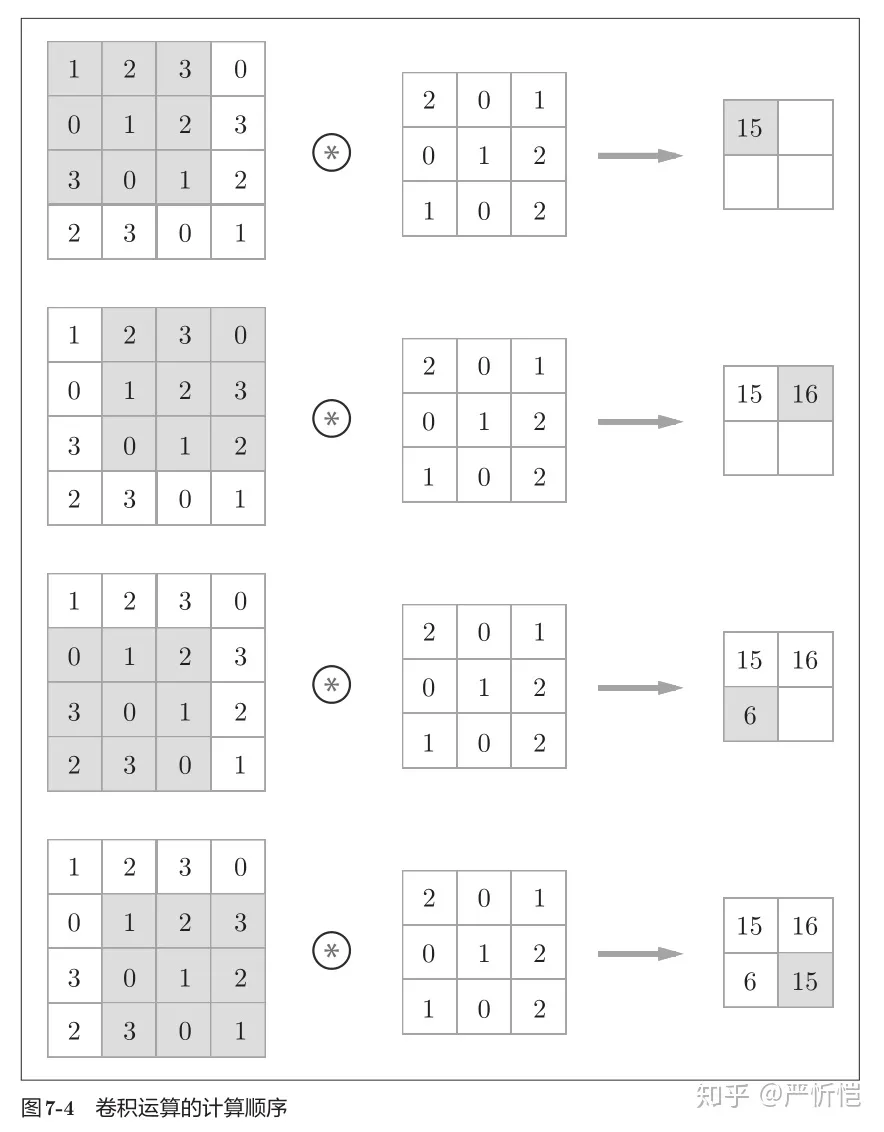  
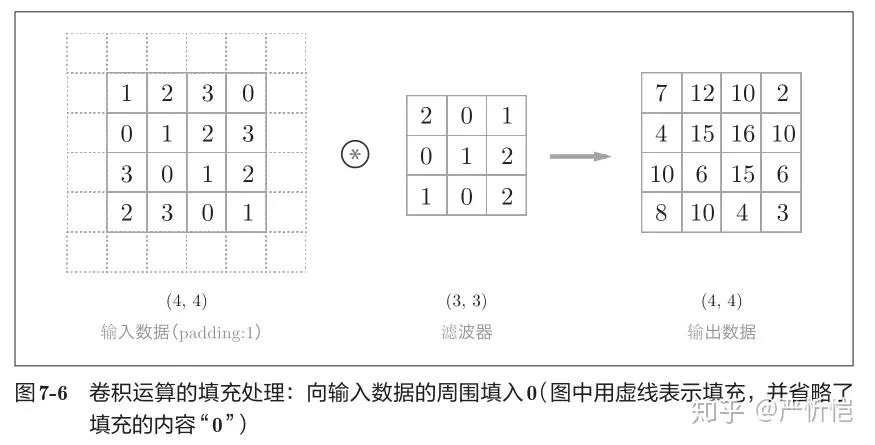  
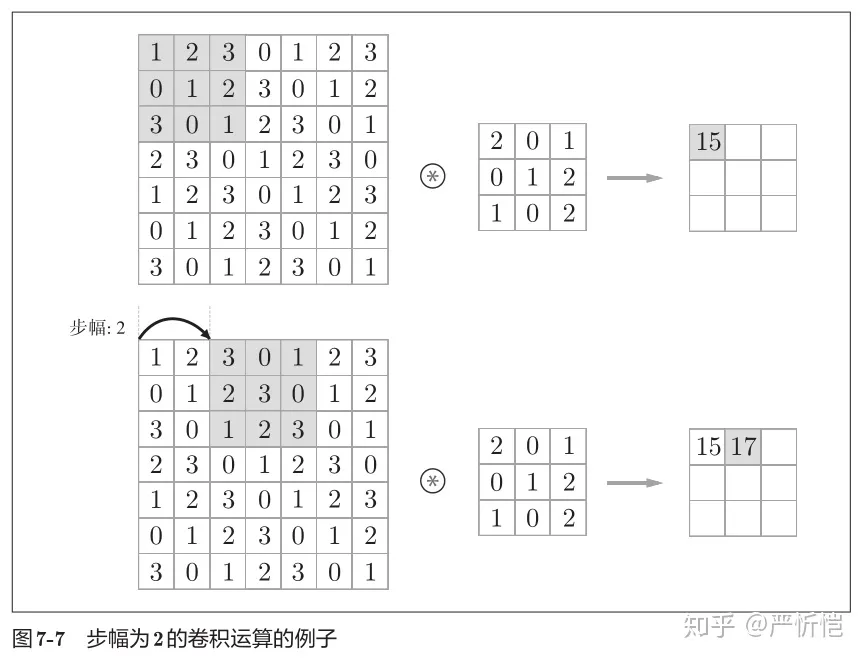  
卷积核大小可以指定为小于输入图像尺寸的任意值，卷积核越大，可提取的输入特征越复杂  
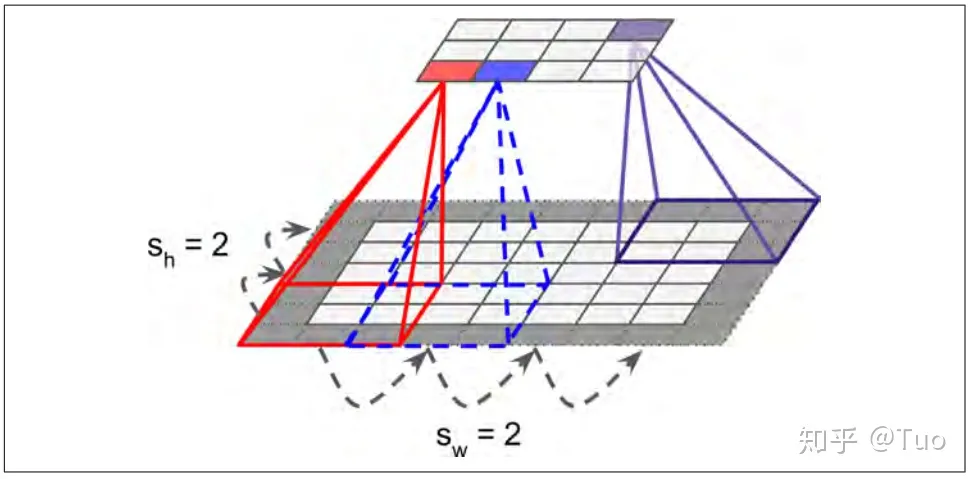   
卷积层中包含激励函数以协助表达复杂特征

In [51]:
# 矩阵输入和矩阵输出卷积(单通道) 
# 输入' X '和权重' K '都是矩阵
h, w = K.shape
Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
# stride = 1 步幅
# 一个矩阵块在该层移动，乘以该层到下一层的权重，加和，形成新矩阵
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
    Y[i, j] = (X[I : i+h, j : j+w] * K).sum()

IndentationError: expected an indented block (1688804139.py, line 8)

- **Pooling Layer**  

通常会在卷积层之后放一个池化层对数据进行压缩，降低维度，减少参数量，防止过拟合   
具体操作是将一个像素点与它周围的数据点进行聚合统计，缩减特征图的尺寸，然后对其相邻的区域取均值或最大值，进一步减少参数量  
池化层计算窗口大小的平均值/最大值  
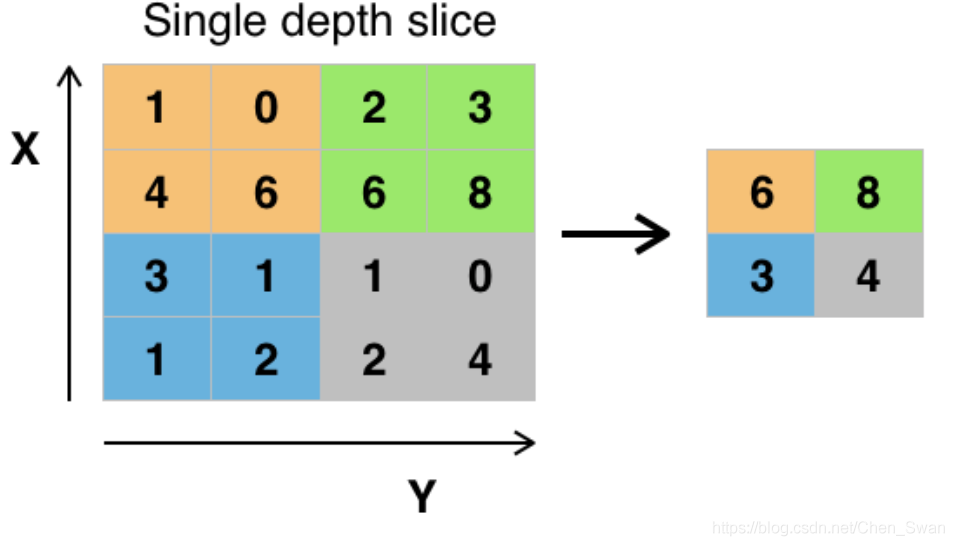

In [ ]:
# h, w: 池化层的高宽
# mode: max or avg
Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
for i in range(Y.shape[0]):
    for j in range(Y.shape[1]):
    if mode == 'max':
    Y[i, j] = X[i : i+h, j : j+w].max()
    elif mode == 'avg':
    Y[i, j] = X[i : i+h, j : j+w].mean()

- **Convolutional Neural Networks (CNN)**  

- 叠加卷积层提取特征  
每个卷积层之后激活函数  
使用池化层来降低位置敏感性  
叠加卷积激活和池化层，有效提取空间信息  

- **Recurrent neural networks**   

Dense layer → **Recurrent networks**  

处理序列的信息，即前面的输入和后面的输入是有关系的
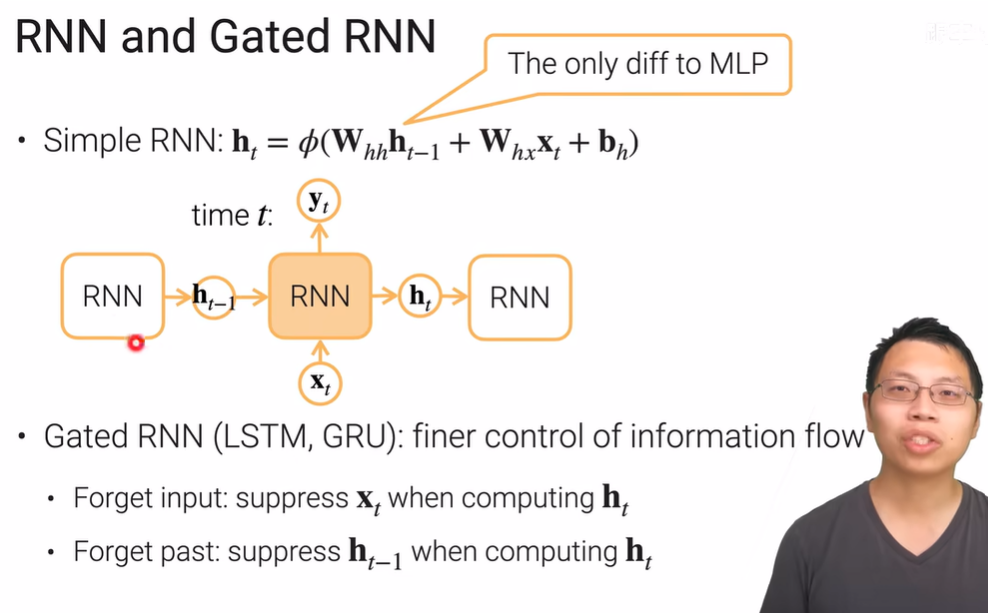    

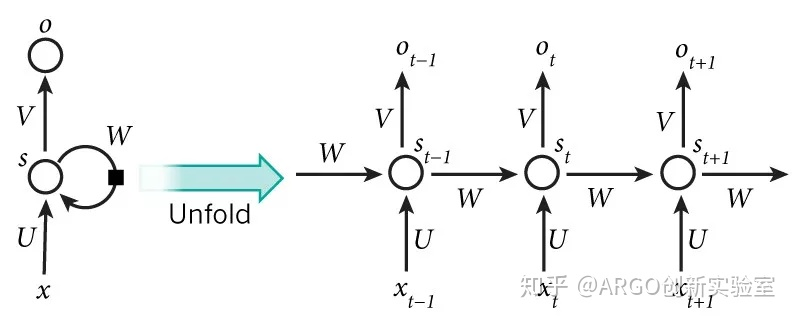
关键一点是St的值不仅取决于Xt，还取决于St-1  
堆叠循环层通过隐藏状态传递时间信息  

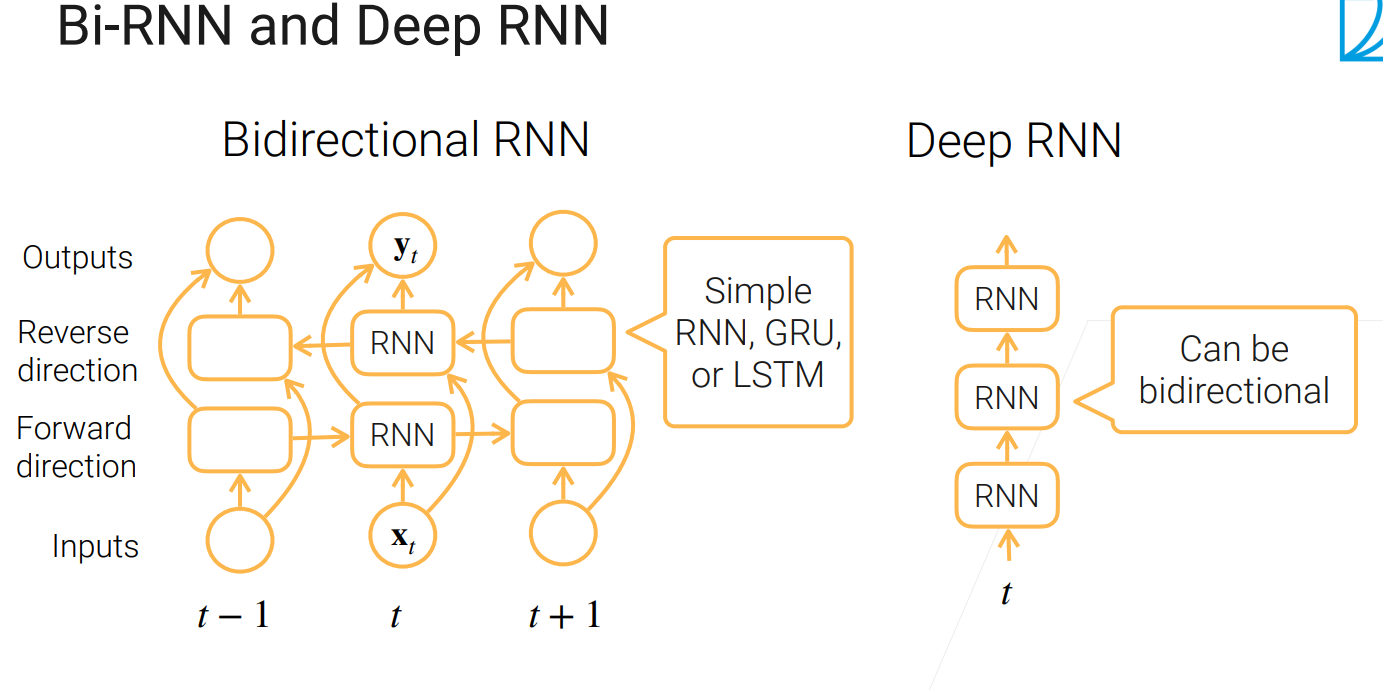

In [ ]:
#RNN的简单实现
W_xh = nn.Parameter(torch.randn(num_inputs, num_hiddens) * 0.01)
W_hh = nn.Parameter(torch.rand(num_hiddens, num_hiddens) * 0.01)
b_h = nn.Parameter(torch.zeros(num_hiddens))
H = torch.zeros(num_hiddens)
outputs = []
for X in inputs: 
    # `inputs` shape : (num_steps, batch_size, num_inputs)
    H = torch.tanh(X @ W_xh + H @ W_hh + b_h)
    outputs.append(H) 